# Load stuff up

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np
from tqdm import tqdm

In [2]:
data_dir = "../data/"

In [3]:
# HAP query mutants, expression lfc to HAP1 WT
hap1_expression_lfc = pd.read_csv(data_dir + "hap1_expression_lfc.csv", index_col=0)

# Raw qGI scores
hap1_crispr = pd.read_csv(data_dir + "hap1_crispr.csv", index_col=0)

# Expression lfc to DepMap median, then z-score transformed
depmap_expression_lfc_zscore = pd.read_csv(data_dir + "depmap_expression_lfc_zscore.csv", index_col=0)

# DepMap CRISPR gene effects, z-score transformed
depmap_crispr_zscore = pd.read_csv(data_dir + "depmap_crispr_zscore.csv", index_col=0)

hap1_expression_lfc.shape, hap1_crispr.shape, depmap_expression_lfc_zscore.shape, depmap_crispr_zscore.shape

((60, 16372), (60, 16432), (1021, 16372), (1021, 16432))

In [4]:
display(hap1_expression_lfc.head(), hap1_crispr.head(), depmap_expression_lfc_zscore.head(), depmap_crispr_zscore.head())

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADACL4,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ARID1A_019_min,-0.084393,0.0,-0.147231,0.157590,0.055844,-0.573164,-0.056520,-0.111263,0.0,0.0,...,0.113578,0.151927,0.148057,-0.081527,-0.237012,1.067202,0.089019,0.209173,0.222016,0.184415
TUBB_312_rich,-0.052505,0.0,0.702654,0.000000,0.000000,-0.036314,-0.081951,-0.166712,0.0,0.0,...,0.140634,0.515692,-0.544428,-0.580111,0.161650,0.126039,-0.151425,0.299858,0.247068,0.602173
RHOA_178_min,0.064315,0.0,-0.147231,0.172966,0.000000,1.067335,-0.011180,-0.202589,0.0,0.0,...,0.245787,0.249655,0.079060,-0.379479,0.036219,-0.572442,-0.069545,-0.251144,0.448150,0.035675
POLR2A_281_rich,0.120074,0.0,-0.073602,0.371187,0.000000,0.367672,-0.065692,-0.936705,0.0,0.0,...,0.252126,-0.201740,0.121699,-0.356995,0.089095,1.727093,-0.550399,-0.521173,-0.125355,0.168875
PSMC5_315_rich,0.139203,0.0,0.077268,0.000000,0.000000,-0.382643,-0.121161,-0.059450,0.0,0.0,...,-0.089155,0.388849,0.089179,0.337710,0.067586,0.318417,-0.167314,-0.185748,-0.135044,-0.150268


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ARID1A_019_min,0.071418,0.316690,0.010574,-0.085196,-0.023159,-0.113766,0.092965,0.049046,0.237073,-0.162579,...,0.043132,0.021004,-0.040488,0.166691,-0.142278,-0.019439,-0.082685,0.326004,-0.313797,0.205942
TUBB_312_rich,-0.154085,0.310388,0.024848,0.054087,0.014244,-0.032237,-0.094366,0.130520,-0.020056,-0.135761,...,-0.076941,-0.022916,0.358132,0.017626,-0.262726,-0.137035,0.037090,0.487719,0.213012,-0.250219
RHOA_178_min,0.202025,-0.037464,0.155645,0.111250,0.100754,-0.006131,-0.091993,-0.013058,0.029283,0.004613,...,0.174488,0.058054,-0.127421,-0.172388,0.060433,-0.035178,0.036162,0.133385,-0.110867,0.000702
POLR2A_281_rich,-0.082532,-0.269977,-0.014917,-0.162425,-0.061699,0.004124,-0.106612,-0.268794,-0.054147,0.019849,...,-0.114852,0.087124,0.168949,-0.507124,-0.233413,-0.224767,0.181330,-0.008551,0.090171,-0.092736
PSMC5_315_rich,0.105695,0.044078,-0.015011,0.002232,-0.058973,-0.005606,-0.187995,0.208284,-0.016312,0.009155,...,0.006981,0.085635,-0.039827,-0.161266,0.152414,-0.044009,0.313931,-0.259948,-0.122938,0.368591


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADACL4,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-000001,0.278897,-0.220332,-0.353268,-0.268837,-0.309877,-0.743399,0.519830,0.175776,-0.085295,-0.132347,...,0.930845,0.399901,-0.110074,-0.325771,1.922237,2.162248,0.364674,0.650601,-0.309991,0.459539
ACH-000004,0.813461,-0.294208,-0.359683,-0.023020,0.977080,-1.310591,1.620091,-1.042164,-0.085295,-0.132347,...,-0.134296,-0.177471,-0.474133,-0.794000,0.276593,-0.922391,-0.864624,0.786428,0.266955,1.326403
ACH-000005,0.725374,-0.275466,-0.399373,-0.370484,-0.309877,-1.352339,1.620091,-0.308089,-0.085295,-0.132347,...,1.656180,0.509160,-0.402540,-0.551458,0.495690,-0.922391,0.307256,0.654327,0.373113,2.444047
ACH-000007,-1.219399,1.548572,-0.366154,-0.385577,-0.309877,-1.360934,0.054641,0.385954,-0.085295,-0.132347,...,-0.708388,-0.150351,-0.884080,-0.571866,0.663667,-0.922391,-0.933668,0.284022,0.570775,-1.035774
ACH-000009,-0.551792,4.387945,-0.340602,-0.385577,0.469807,1.366802,0.473854,0.665283,-0.029190,-0.132347,...,0.507797,1.638779,-0.388467,0.094491,0.511794,0.344079,0.620275,1.424754,0.265194,-1.229187


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
ACH-000001,-0.825790,1.153641,-0.120724,-2.138049,0.749360,2.491614,-0.808823,0.278632,1.873050,-0.978996,...,-1.359505,0.529369,1.837358,1.468376,2.201187,-2.375966,1.274226,0.793520,2.415169,-0.791616
ACH-000004,0.564651,0.039711,-1.116518,-1.067062,0.710438,-0.589461,2.453345,0.314213,2.007243,0.418096,...,1.702279,0.304934,0.409581,1.605519,1.531281,0.988895,-1.431617,1.104457,3.459211,1.493639
ACH-000005,-0.675136,0.654328,1.631419,0.459201,-0.386119,-1.227648,1.333600,0.098420,-0.592599,-0.686365,...,0.512223,-0.458845,0.407150,-0.712505,0.578254,-1.453687,0.371510,-0.239804,1.453696,0.900438
ACH-000007,0.068759,-0.511652,0.232759,0.373540,1.065789,0.555382,-0.236842,-0.392243,-1.249900,0.813795,...,-0.124342,-0.468698,0.226961,-0.382168,1.056793,-0.401302,-1.834813,0.189337,-1.291572,-0.904509
ACH-000009,0.458528,-0.600294,0.409748,0.175980,1.525947,-0.326908,0.155399,-0.078622,0.569985,-0.080630,...,0.606654,-0.190064,0.979833,-0.488176,-0.103982,-0.530175,-2.898226,0.966610,1.245292,0.094239


In [5]:
from utils import *

In [8]:
direct_linear = pd.read_csv("../output/direct_linear.csv", index_col=0)
combined_linear = pd.read_csv("../output/combined_linear.csv", index_col=0)
direct_linear_ae = pd.read_csv("../output/direct_linear_autoencoded.csv", index_col=0)
ARM = pd.read_csv("../output/DepMap_ARM_linear.csv", index_col=0)
MAML = pd.read_csv("../output/DepMap_MAML_linear.csv", index_col=0)
labels = pd.read_csv("../output/kfold_zscore_labels.csv", index_col=0)

In [9]:
all_genes = labels.columns
len(all_genes)

16432

In [10]:
direct_linear_library_corrs = []
for g in tqdm(direct_linear.columns):
    direct_linear_library_corrs.append({
        "gene" : g,
        "corr" : direct_linear[g].corr(labels[g])
    })

100%|███████████████████████████████████████████████████████| 16432/16432 [00:03<00:00, 4265.12it/s]


In [11]:
direct_linear_library_corrs_df = pd.DataFrame(direct_linear_library_corrs).set_index("gene")
direct_linear_library_corrs_df

,corr
gene,
A1BG,0.061669
A1CF,0.116538
A2M,0.054109
A2ML1,0.026085
A3GALT2,-0.035253
...,...
ZYG11A,-0.017763
ZYG11B,-0.160340
ZYX,-0.009973


In [12]:
replicate_library_corrs_df = pd.read_csv("../output/replicate_library_gene_corrs.csv", index_col=0)
replicate_library_corrs_df

,corr
gene,
A1BG,0.148626
A1CF,-0.259902
A2M,-0.082028
A2ML1,0.016557
A3GALT2,0.049273
...,...
ZYG11A,0.023778
ZYG11B,0.109502
ZYX,-0.104505


In [13]:
all(direct_linear_library_corrs_df.index == replicate_library_corrs_df.index)

True

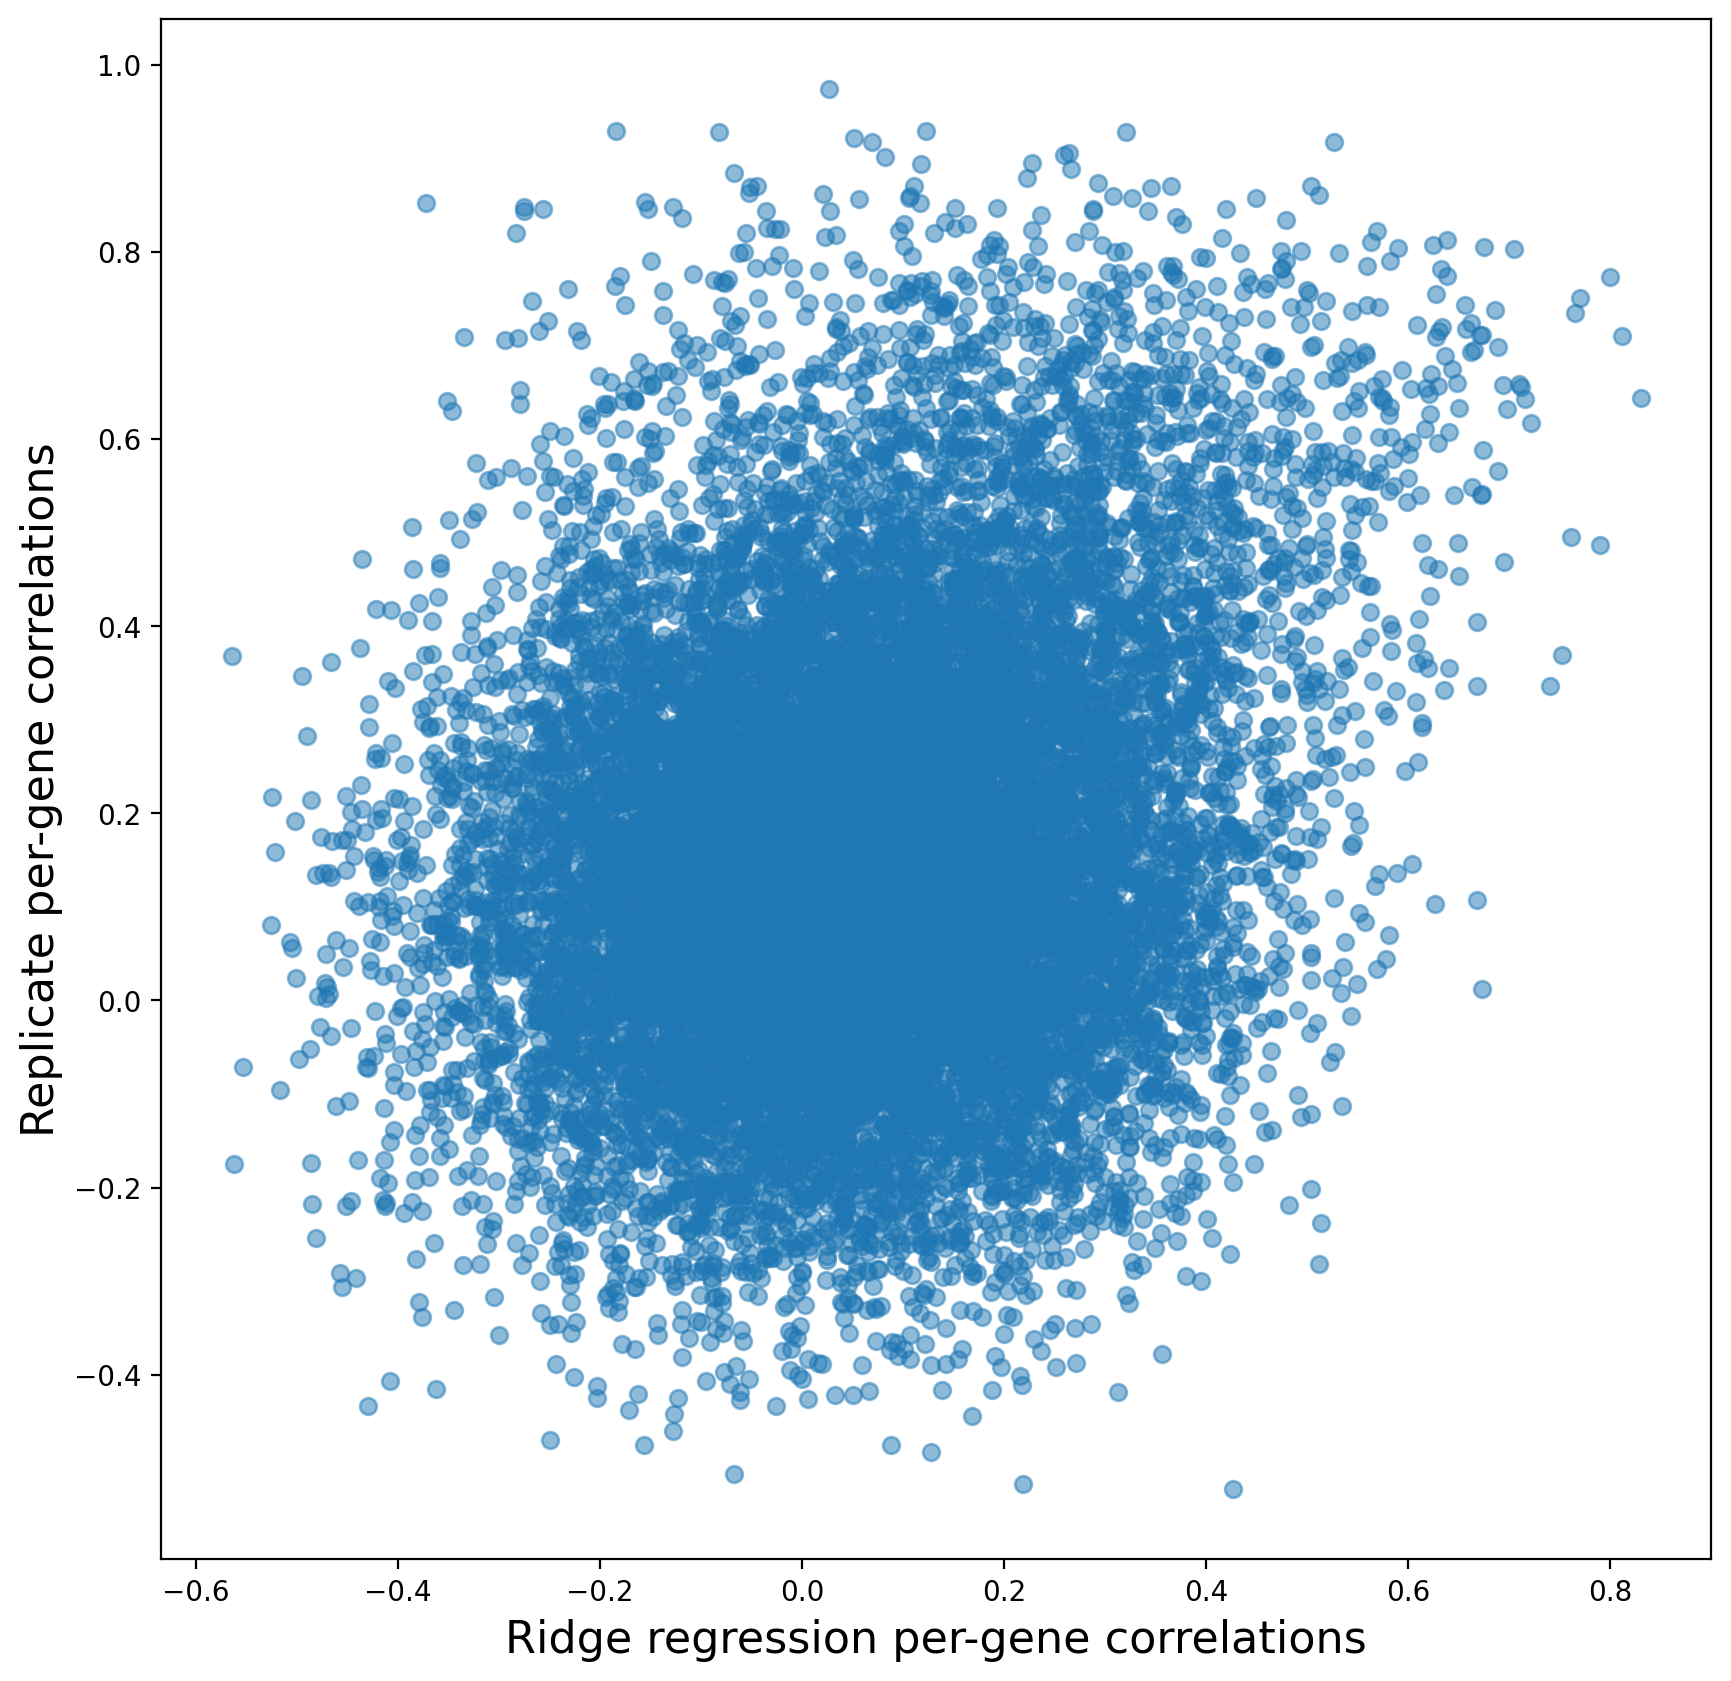

In [14]:
plt.figure(figsize=(10, 10), dpi=200)
plt.scatter(direct_linear_library_corrs_df["corr"], replicate_library_corrs_df["corr"], alpha=0.5)

plt.xlabel("Ridge regression per-gene correlations", size=16)
plt.ylabel("Replicate per-gene correlations", size=16)

direct_linear_library_corrs_df["corr"].corr(replicate_library_corrs_df["corr"])
plt.show()

In [15]:
from scipy.stats import pearsonr

pearsonr(direct_linear_library_corrs_df["corr"], replicate_library_corrs_df["corr"])

PearsonRResult(statistic=0.2216389318773555, pvalue=5.449691033711384e-182)

In [16]:
replicate_corr_means_df = pd.read_csv("../output/replicate_corr_means.csv", index_col=0)
replicate_corr_means_df.head()

,Mean corr
VPS52,0.629613
GSK3A,0.451996
POLR2A,0.435029
LAMTOR4,0.413004
PELO,0.362432


In [29]:
direct_linear_corrs = evaluate_Challenge_B(direct_linear.T, labels.T)

In [30]:
raw_qGI = pd.read_csv("../../GI_prediction/raw_data/qGI_20211111_fullFF.txt", index_col=0, sep="\t").loc[labels.columns]
high_var = raw_qGI.var(axis=1).sort_values()[-1000:].index
len(high_var)

high_var0 = raw_qGI.var(axis=1).sort_values()[-12000:].index

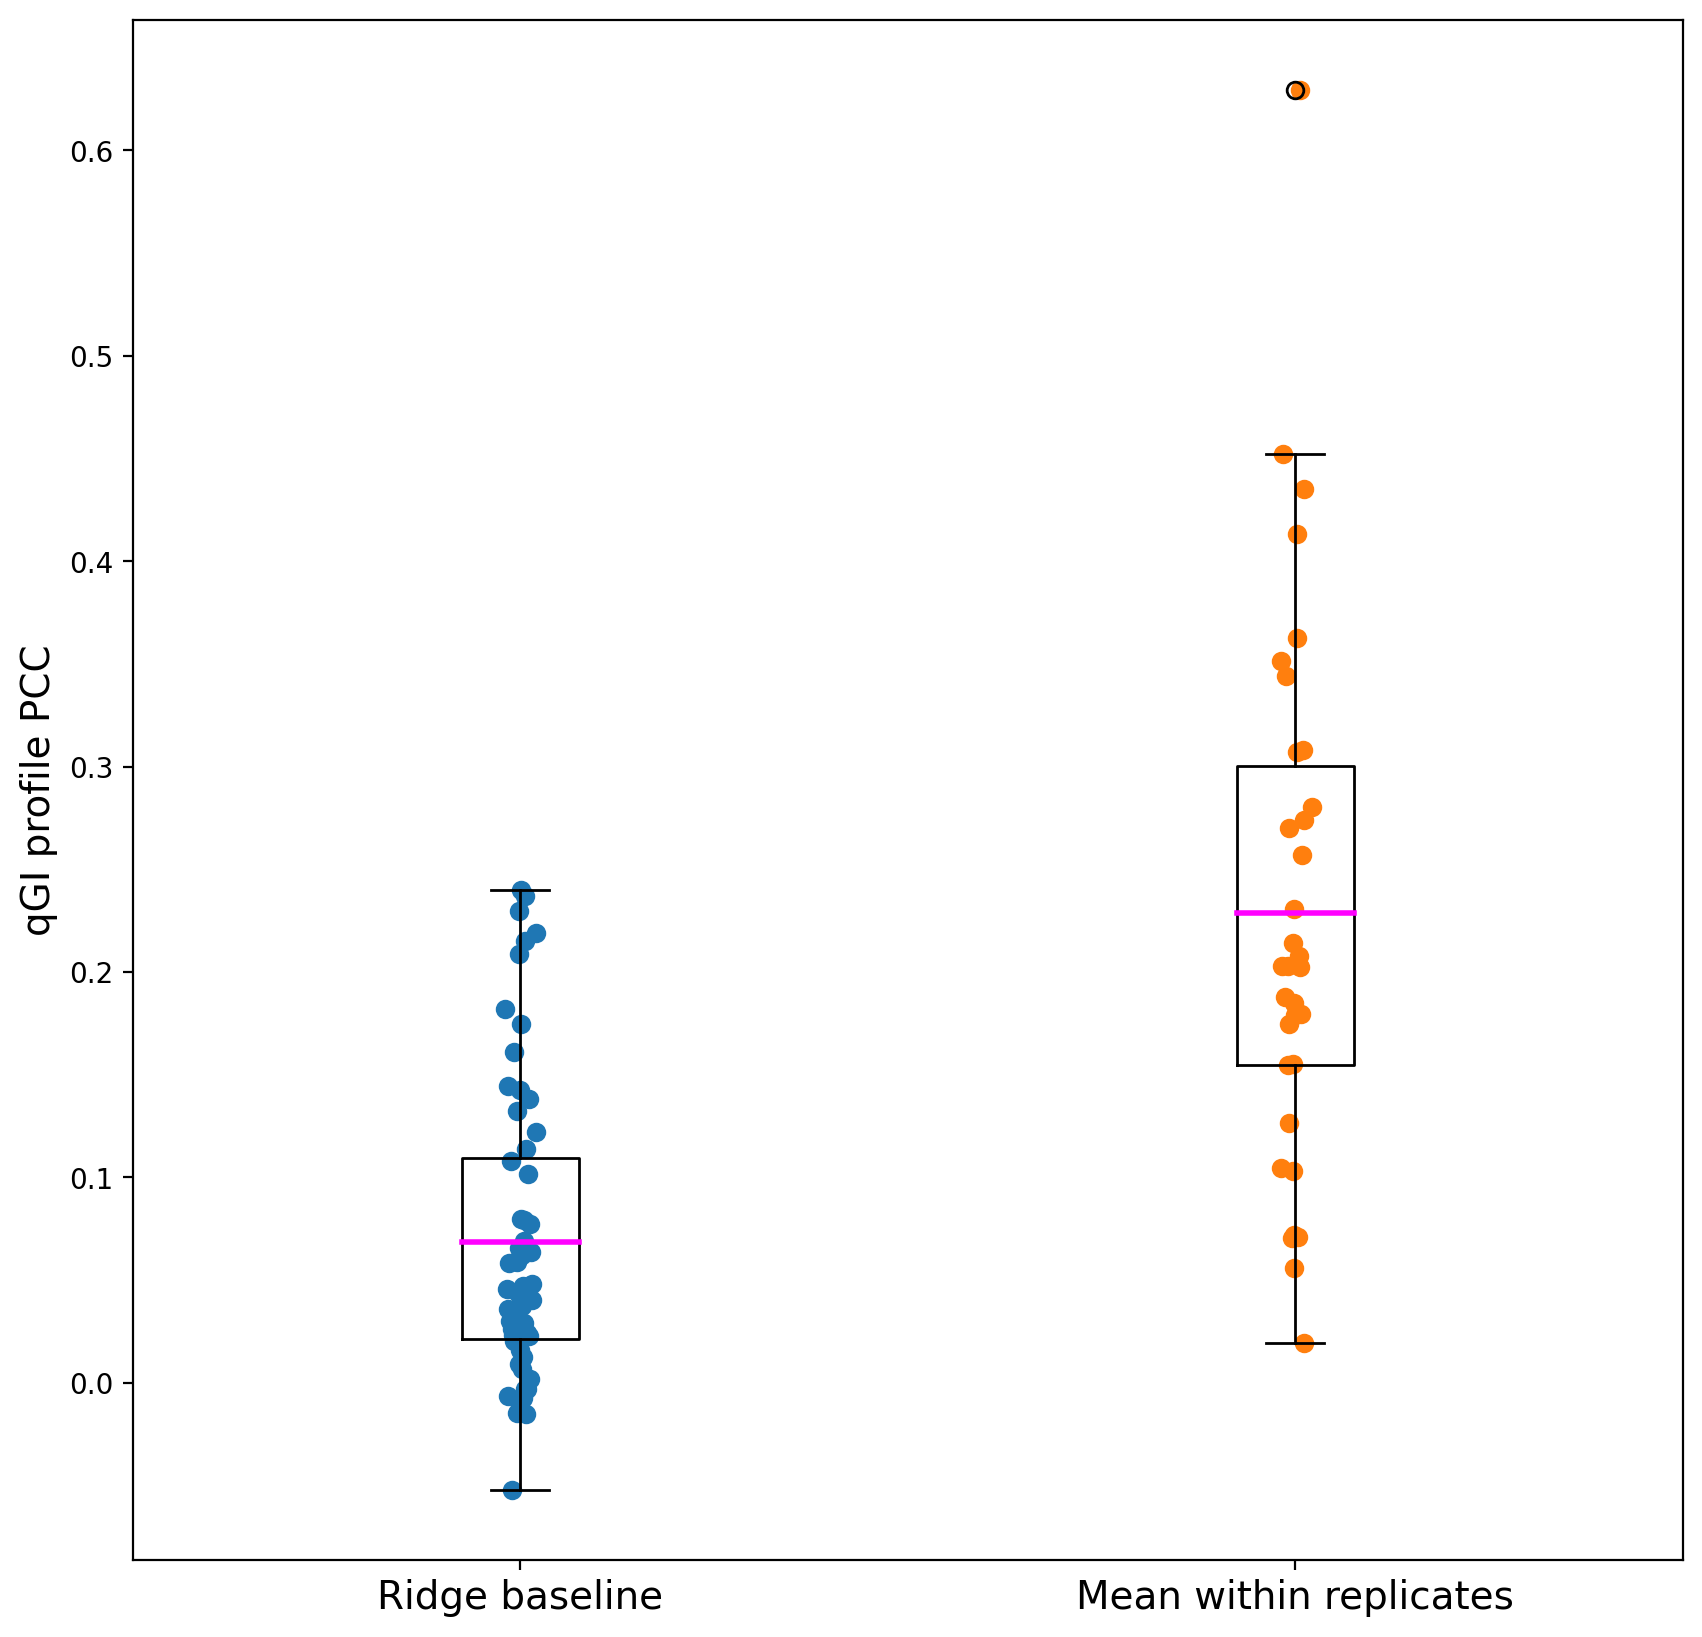

In [31]:
plt.figure(figsize=(10, 10), dpi=200)
plt.boxplot([direct_linear_corrs, replicate_corr_means_df.values.flatten()], positions=[0, 1], 
        usermedians=[np.mean(direct_linear_corrs), replicate_corr_means_df.mean().mean()],
        medianprops={'color': 'magenta', 'linewidth' : 2})

n = len(direct_linear_corrs)
m = len(replicate_corr_means_df)
plt.scatter(np.zeros(n) + np.random.randn(n) * 0.01, direct_linear_corrs)
plt.scatter(np.ones(m) + np.random.randn(m) * 0.01, replicate_corr_means_df)

plt.ylabel("qGI profile PCC", size=14)
plt.xticks([0, 1], ["Ridge baseline", "Mean within replicates"], size=14)
plt.show()

In [32]:
from scipy.stats import ranksums

In [33]:
ranksums(direct_linear_corrs, replicate_corr_means_df.values.flatten())

RanksumsResult(statistic=-5.97249111801757, pvalue=2.3365787101099005e-09)

In [34]:
combined_linear_corrs = evaluate_Challenge_B(combined_linear.T, labels.T)
np.mean(combined_linear_corrs)

0.08482849707500799

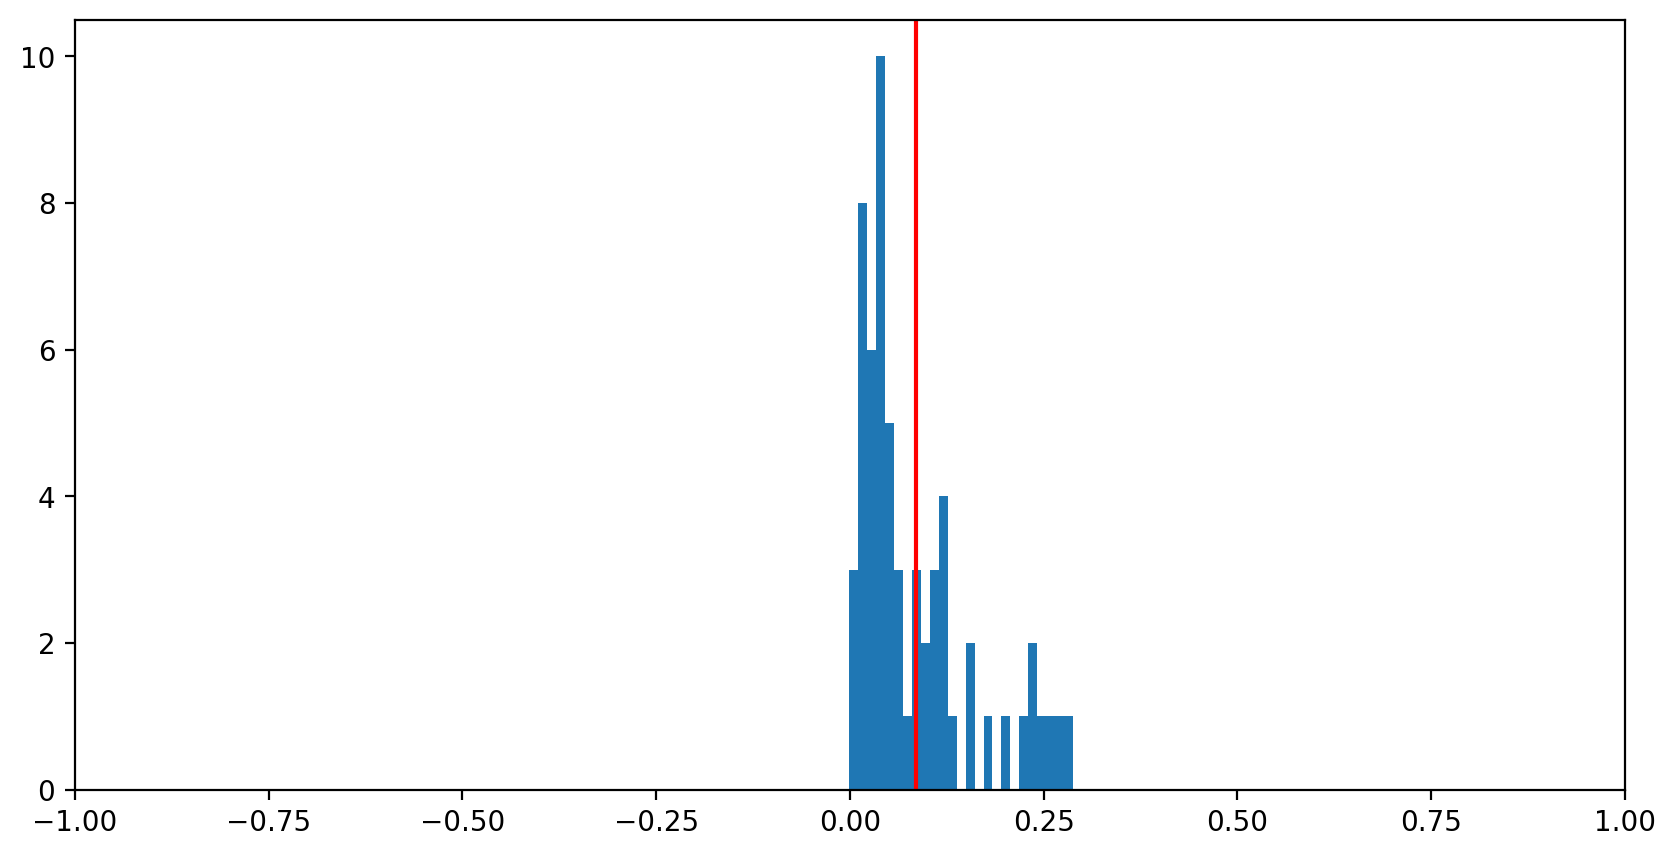

In [35]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(combined_linear_corrs, bins=25)
plt.axvline(x=np.mean(combined_linear_corrs), color='red')
plt.xlim(-1, 1)
plt.show()

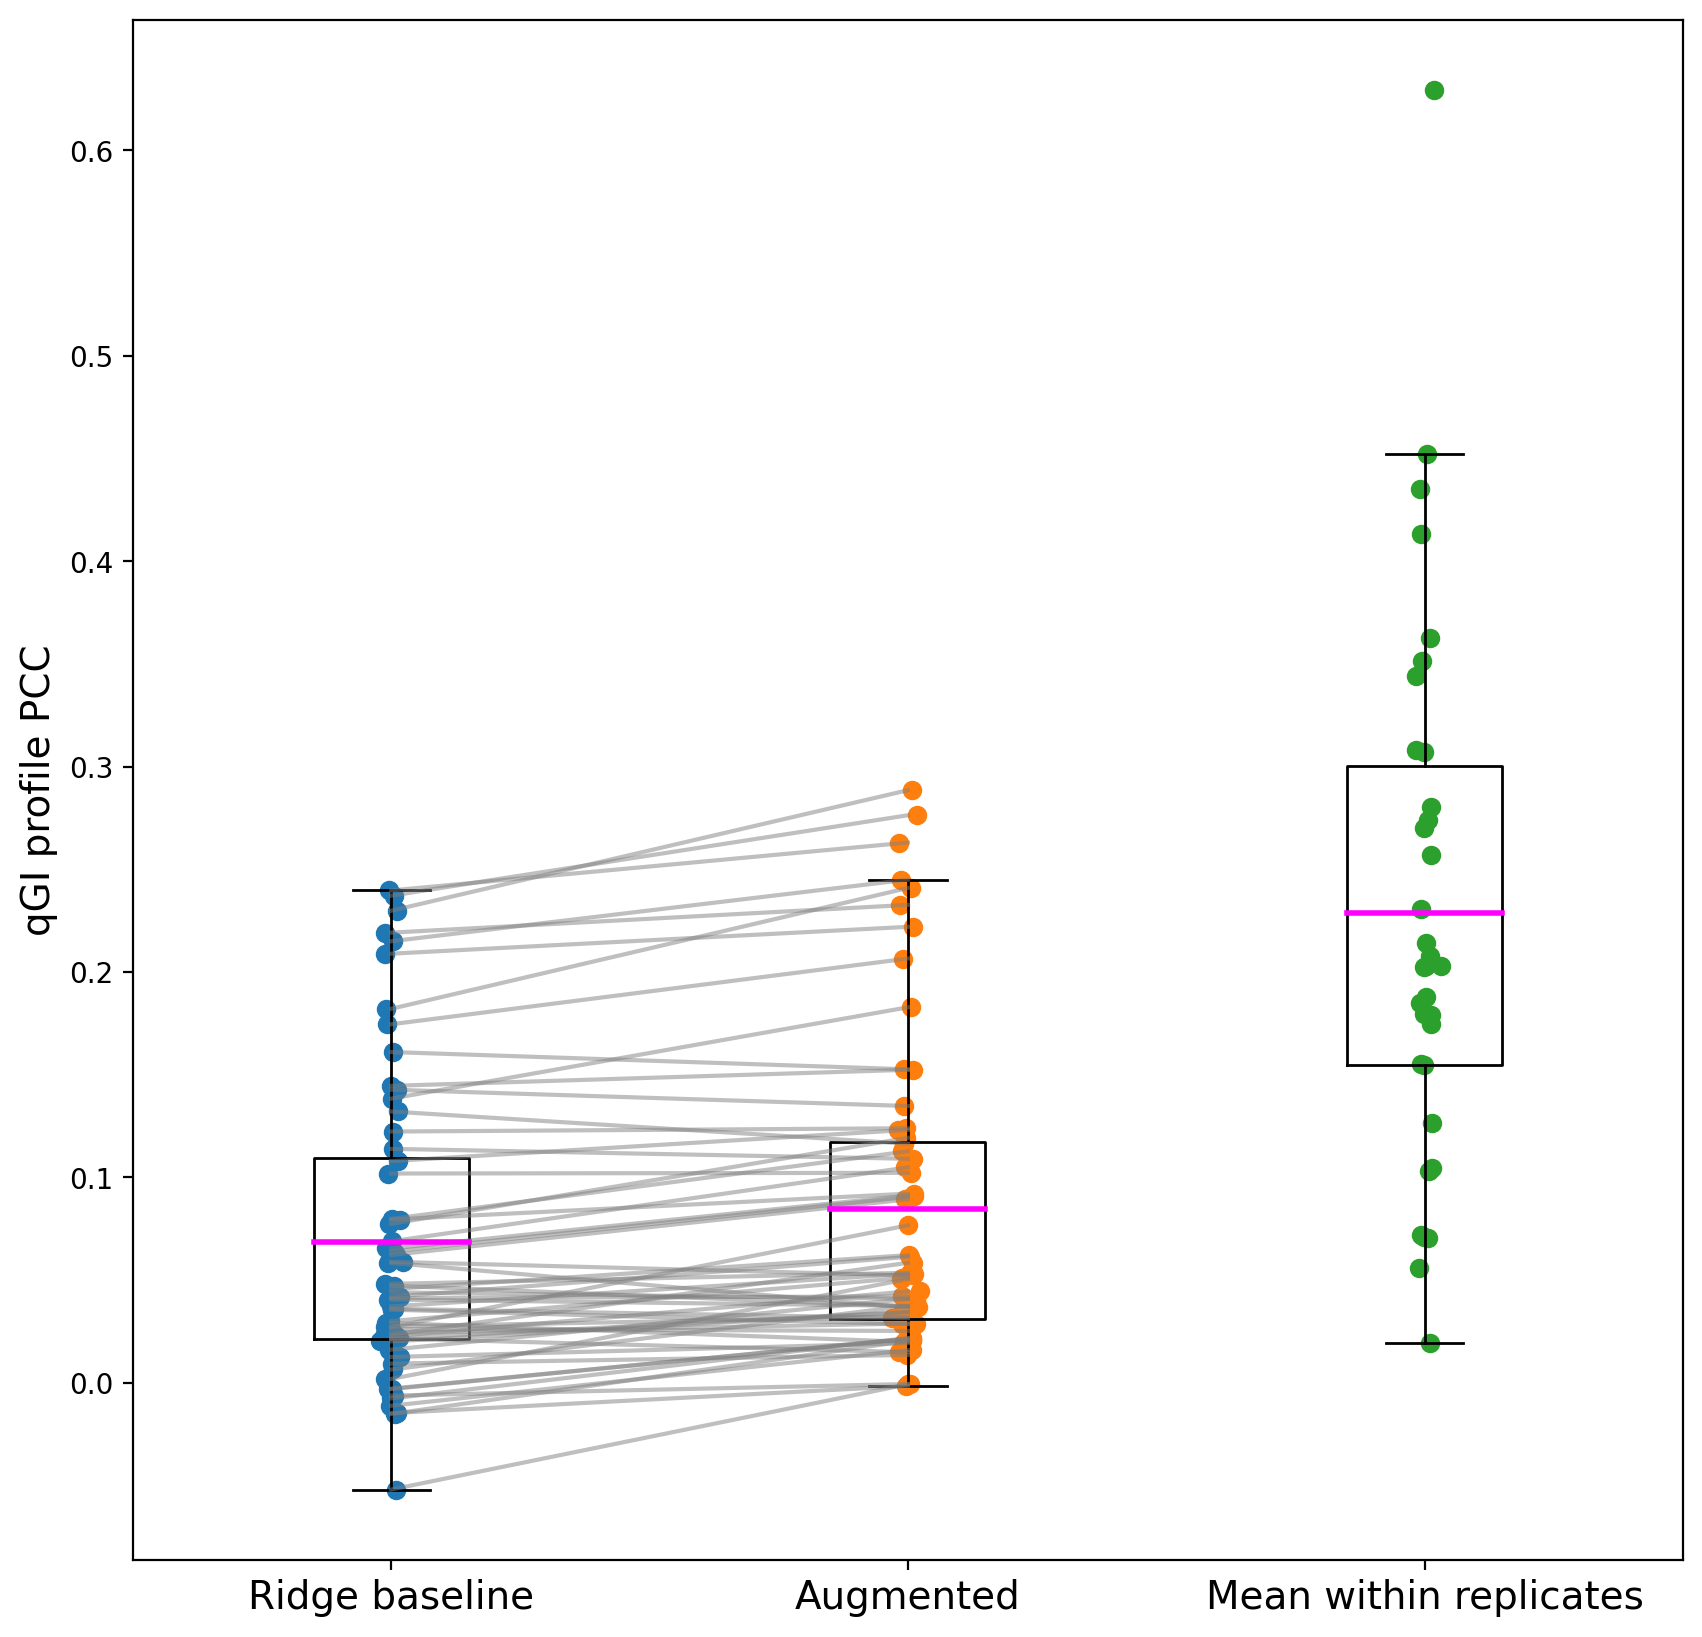

In [36]:
plt.figure(figsize=(10, 10), dpi=200)
plt.boxplot([direct_linear_corrs, combined_linear_corrs, replicate_corr_means_df.values.flatten()], positions=[0, 1, 2], showfliers=False,
        usermedians=[np.mean(direct_linear_corrs), np.mean(combined_linear_corrs), replicate_corr_means_df.mean().mean()],
        medianprops={'color': 'magenta', 'linewidth' : 2}
       )

n = len(direct_linear_corrs)
m = len(combined_linear_corrs)

plt.scatter(np.zeros(n) + np.random.randn(n) * 0.01, direct_linear_corrs)
plt.scatter(np.ones(m) + np.random.randn(m) * 0.01, combined_linear_corrs)

m = len(replicate_corr_means_df)
plt.scatter(np.ones(m) * 2 + np.random.randn(m) * 0.01, replicate_corr_means_df)

for a, b in zip(direct_linear_corrs, combined_linear_corrs):
    plt.plot([0, 1], [a, b], c="grey", alpha=0.5)

plt.ylabel("qGI profile PCC", size=14)
plt.xticks([0, 1, 2], ["Ridge baseline", "Augmented", "Mean within replicates"], size=14)
plt.show()

In [37]:
from scipy.stats import wilcoxon

wilcoxon(direct_linear_corrs, combined_linear_corrs)

WilcoxonResult(statistic=226.0, pvalue=3.933575753133048e-07)

In [38]:
ranksums(combined_linear_corrs, replicate_corr_means_df.values.flatten())

RanksumsResult(statistic=-5.516095222306082, pvalue=3.466145039939304e-08)

In [39]:
ARM_corrs = evaluate_Challenge_B(ARM.T, labels.T)
np.mean(ARM_corrs)

0.09030968167106504

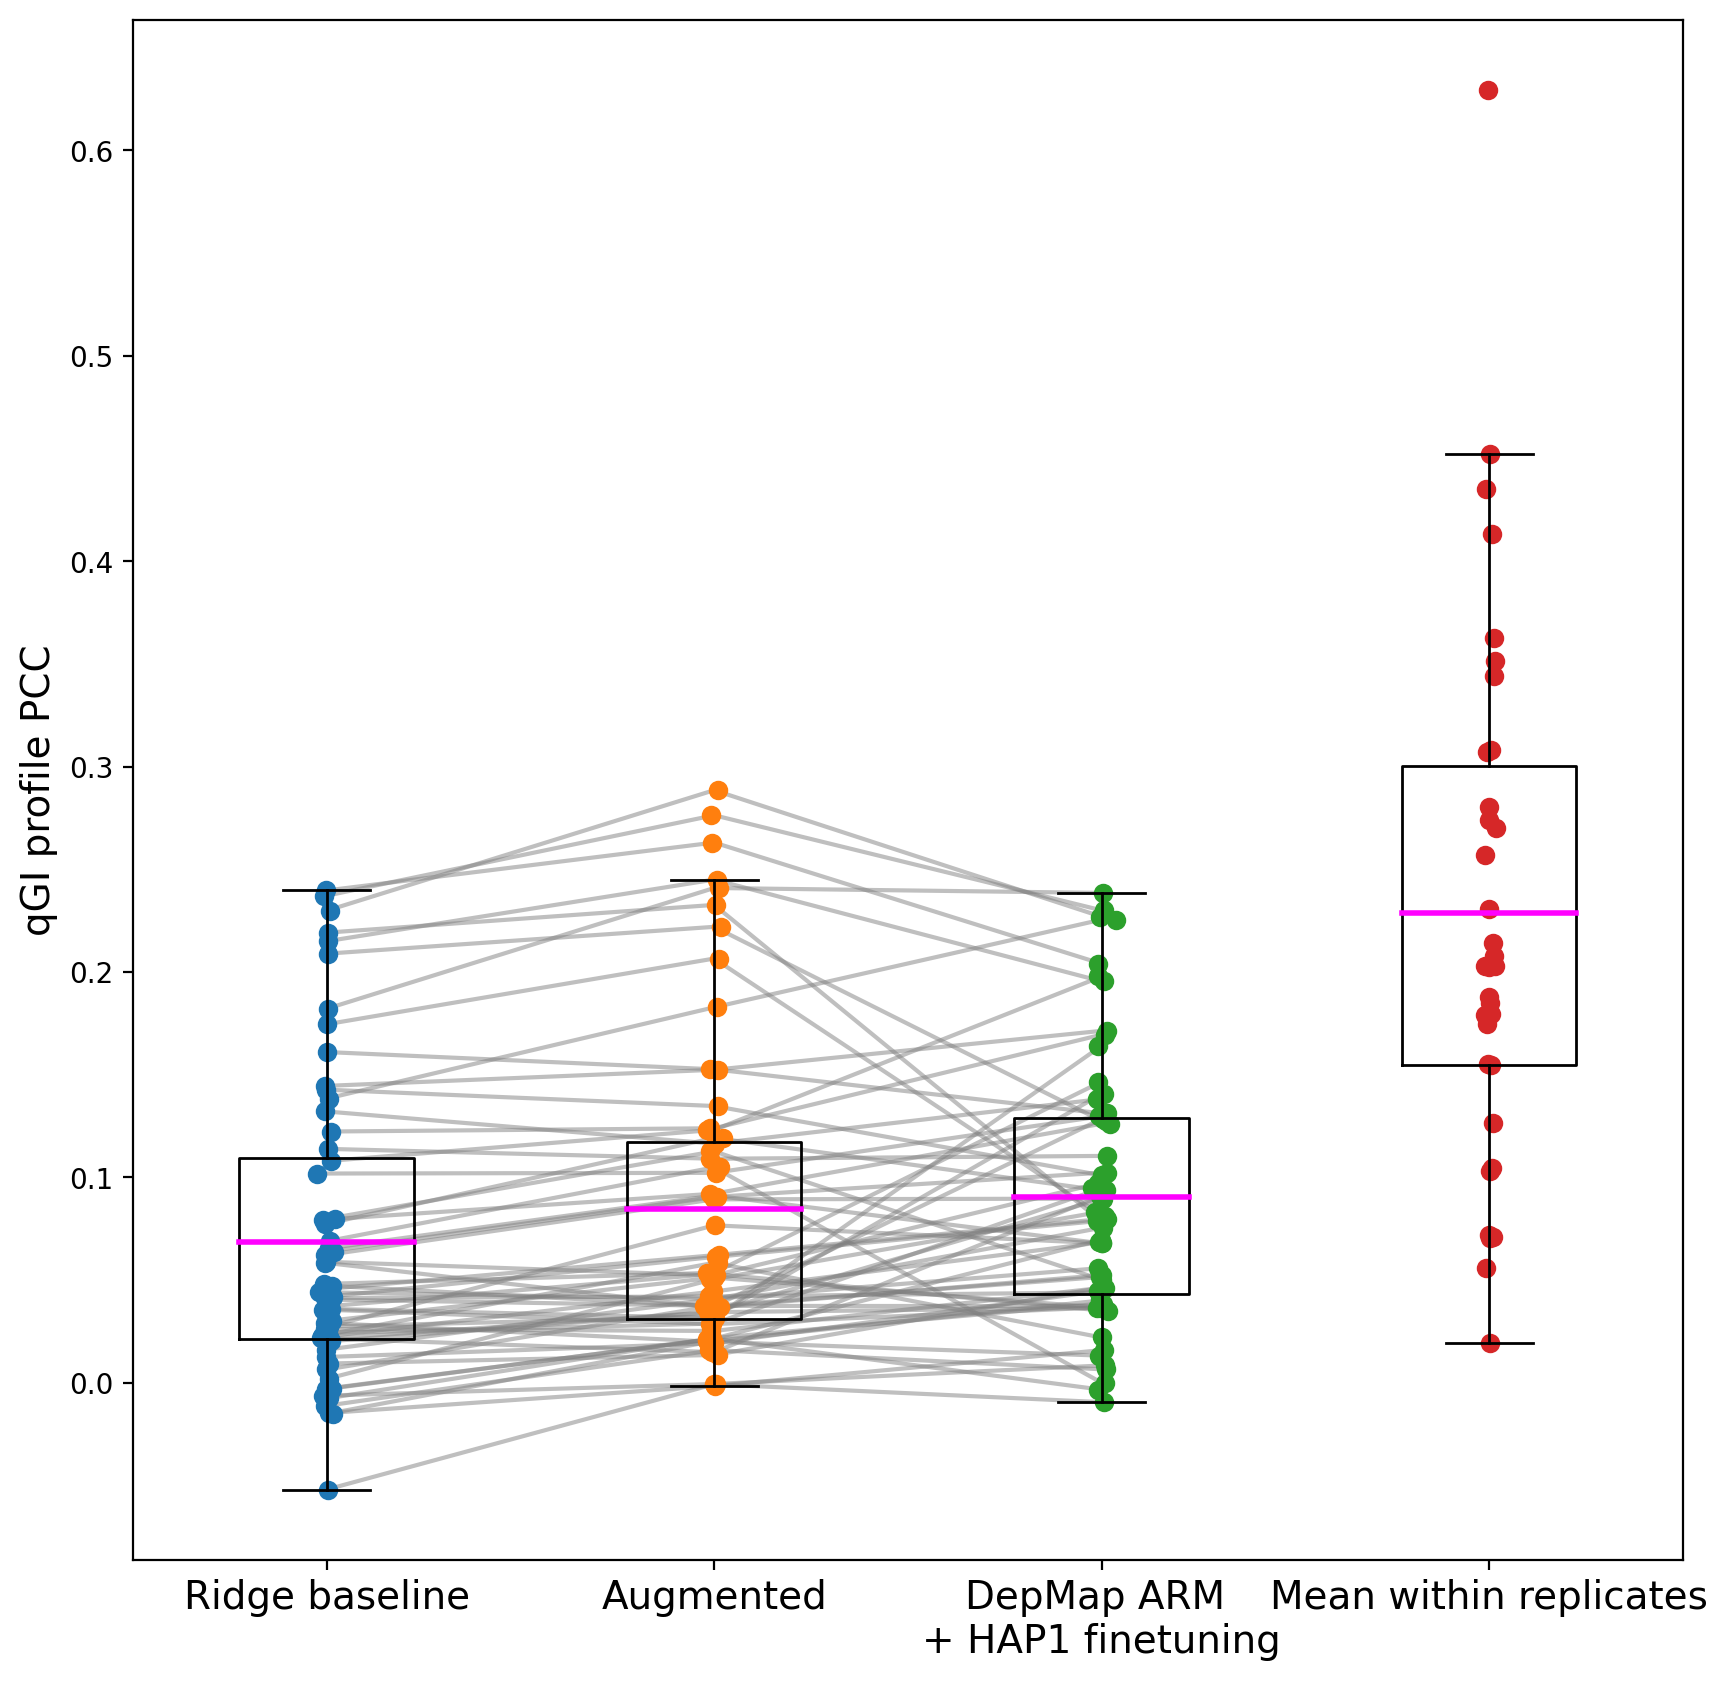

In [40]:
list_of_corrs = [direct_linear_corrs, combined_linear_corrs, 
                 ARM_corrs, replicate_corr_means_df.values.flatten()
                ]

plt.figure(figsize=(10, 10), dpi=200)
plt.boxplot(list_of_corrs, positions=np.arange(len(list_of_corrs)),
        usermedians=[np.mean(c) for c in list_of_corrs],
        medianprops={'color': 'magenta', 'linewidth' : 2},
            showfliers=False)

for i in range(len(list_of_corrs)):
    c = list_of_corrs[i]
    n = len(c)
    plt.scatter(np.ones(n) * i + np.random.randn(n) * 0.01, c)

for i in range(len(list_of_corrs) - 2):
    for a, b in zip(list_of_corrs[i], list_of_corrs[i + 1]):
        plt.plot([i, i + 1], [a, b], c="grey", alpha=0.5, zorder=-3)

plt.ylabel("qGI profile PCC", size=14)
plt.xticks([0, 1, 2, 3], ["Ridge baseline", "Augmented", "DepMap ARM \n+ HAP1 finetuning", "Mean within replicates"], size=14)
plt.show()

In [41]:
wilcoxon(direct_linear_corrs, combined_linear_corrs)

WilcoxonResult(statistic=226.0, pvalue=3.933575753133048e-07)

In [42]:
wilcoxon(combined_linear_corrs, ARM_corrs)

WilcoxonResult(statistic=734.0, pvalue=0.18271231418536016)

In [43]:
for i in range(len(list_of_corrs)):
    for j in range(i + 1, len(list_of_corrs)):
        if j == 3: continue
        print(i, j)
        print(wilcoxon(list_of_corrs[i], list_of_corrs[j]).pvalue)
        print()
    

0 1
3.933575753133048e-07

0 2
0.00023250195736898227

1 2
0.18271231418536016



In [44]:
MAML_corrs = evaluate_Challenge_B(MAML.T, labels.T)
np.mean(MAML_corrs)

0.15887651558179736

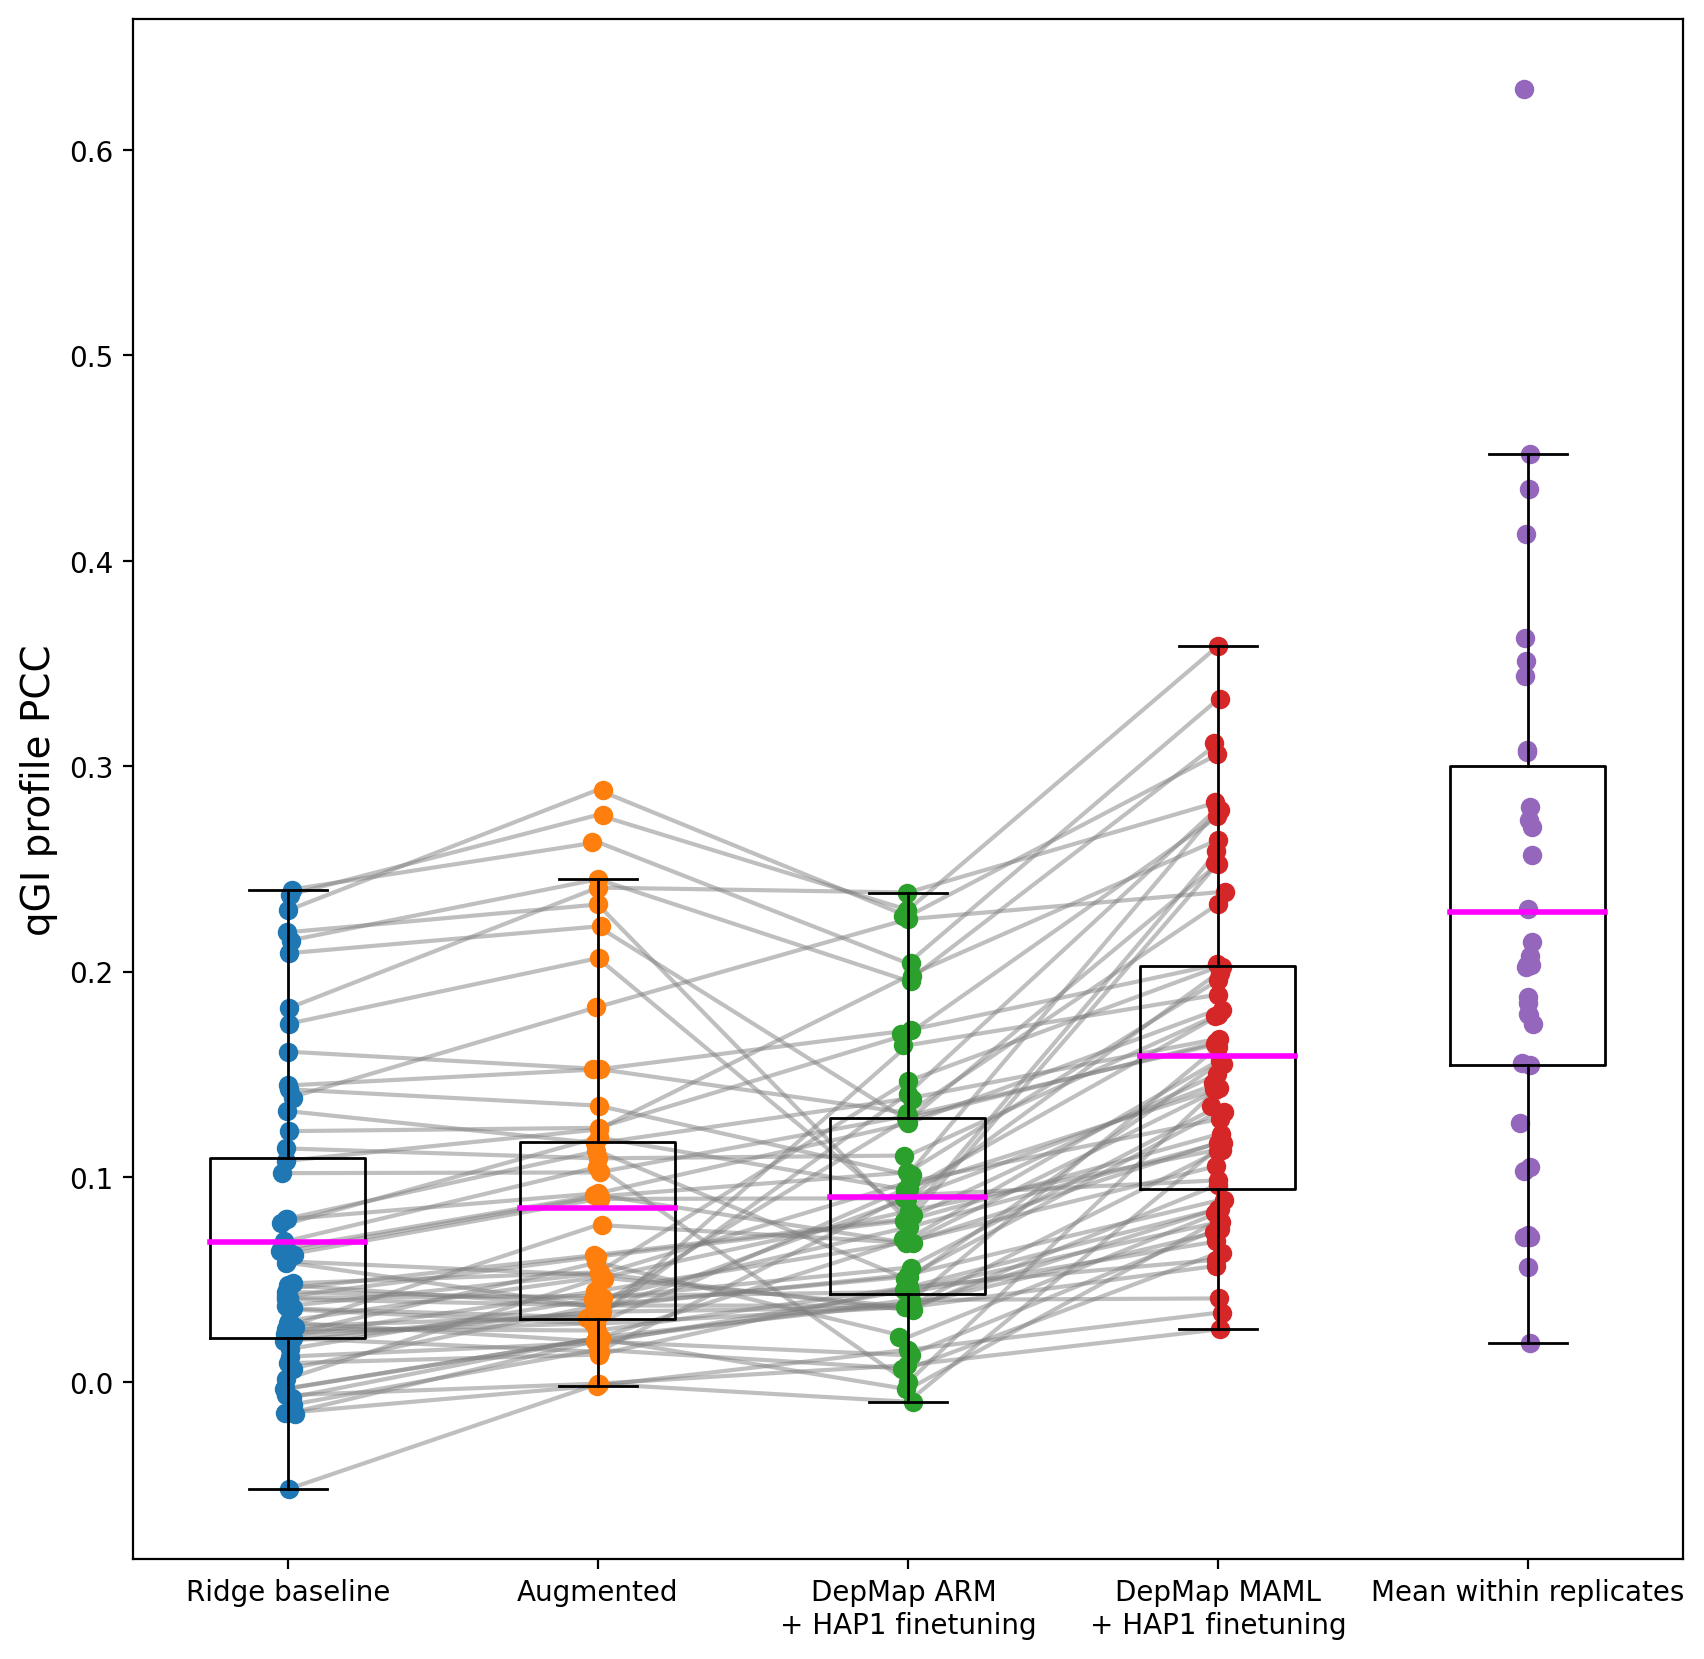

In [45]:
list_of_corrs = [direct_linear_corrs, combined_linear_corrs, 
                 ARM_corrs, MAML_corrs, replicate_corr_means_df.values.flatten()
                ]

plt.figure(figsize=(10, 10), dpi=200)
plt.boxplot(list_of_corrs, positions=np.arange(len(list_of_corrs)),
        usermedians=[np.mean(c) for c in list_of_corrs],
        medianprops={'color': 'magenta', 'linewidth' : 2},
            showfliers=False)

for i in range(len(list_of_corrs)):
    c = list_of_corrs[i]
    n = len(c)
    plt.scatter(np.ones(n) * i + np.random.randn(n) * 0.01, c)

for i in range(len(list_of_corrs) - 2):
    for a, b in zip(list_of_corrs[i], list_of_corrs[i + 1]):
        plt.plot([i, i + 1], [a, b], c="grey", alpha=0.5, zorder=-3)

plt.ylabel("qGI profile PCC", size=14)
plt.xticks([0, 1, 2, 3, 4], ["Ridge baseline", "Augmented", "DepMap ARM \n+ HAP1 finetuning", 
                          "DepMap MAML\n+ HAP1 finetuning",
                          "Mean within replicates"], size=10)
plt.show()

In [46]:
for i in range(len(list_of_corrs)):
    for j in range(i + 1, len(list_of_corrs)):
        if j == 4: continue
        print(i, j)
        print(wilcoxon(list_of_corrs[i], list_of_corrs[j]).pvalue)
        print()

0 1
3.933575753133048e-07

0 2
0.00023250195736898227

0 3
1.6295557943119345e-11

1 2
0.18271231418536016

1 3
1.6295557943119345e-11

2 3
1.6295557943119345e-11



In [47]:
for i in range(len(list_of_corrs) - 1):
    print(i)
    print(ranksums(list_of_corrs[i], list_of_corrs[-1]).pvalue)
    print()

0
2.3365787101099005e-09

1
3.466145039939304e-08

2
4.143599723741797e-08

3
0.0072901065535958265



In [48]:
for i in range(len(list_of_corrs) - 1):
    print(i)
    print(ranksums(list_of_corrs[i], list_of_corrs[-1]).pvalue)
    print()

0
2.3365787101099005e-09

1
3.466145039939304e-08

2
4.143599723741797e-08

3
0.0072901065535958265



In [49]:
from scipy.stats import wilcoxon
from scipy.stats import false_discovery_control

def analyze_gene_set(dic, pred1, pred2):
    infos = []

    for d in tqdm(dic):
        in_both = sorted(set(dic[d]) & set(labels.columns))
        corrs1 = evaluate_Challenge_B(pred1[in_both], labels[in_both])
        corrs2 = evaluate_Challenge_B(pred2[in_both], labels[in_both])

        mean_corrs1 = np.mean(corrs1)
        mean_corrs2 = np.mean(corrs2)

        infos.append({
            "module_name" : d,
            "direct_linear_corr" : mean_corrs1,
            "direct_linear_ae_corr" : mean_corrs2,
            "num_genes" : len(corrs1),
            "diff" : mean_corrs2 - mean_corrs1,
            "wilcoxon" : wilcoxon(corrs1, corrs2).pvalue
        })
        
    info_df = pd.DataFrame(infos)
    info_df["wilcoxon_bh"] = false_discovery_control(info_df["wilcoxon"])
    
    return info_df

In [50]:
from gseapy.parser import read_gmt

In [51]:
! ls ../data/cancer_gene_sets/

ls: ../data/cancer_gene_sets/: No such file or directory


In [53]:
import os

for c in os.listdir("../data/cancer_gene_sets"):
    if not c.endswith("gmt"): continue
    dic = read_gmt("../data/cancer_gene_sets/" + c)
    info_df = analyze_gene_set(dic, direct_linear, direct_linear_ae)
    print(c)
    display(info_df[info_df["wilcoxon_bh"] < 0.05])

100%|█████████████████████████████████████████████████████████████| 189/189 [00:04<00:00, 45.10it/s]

c6.all.v2023.2.Hs.symbols.gmt


,module_name,direct_linear_corr,direct_linear_ae_corr,num_genes,diff,wilcoxon,wilcoxon_bh


100%|████████████████████████████████████████████████████████████| 149/149 [00:01<00:00, 111.53it/s]

c4.3ca.v2023.2.Hs.symbols.gmt


,module_name,direct_linear_corr,direct_linear_ae_corr,num_genes,diff,wilcoxon,wilcoxon_bh


100%|█████████████████████████████████████████████████████████████| 427/427 [00:06<00:00, 70.36it/s]

c4.cgn.v2023.2.Hs.symbols.gmt


,module_name,direct_linear_corr,direct_linear_ae_corr,num_genes,diff,wilcoxon,wilcoxon_bh


100%|█████████████████████████████████████████████████████████████| 431/431 [00:06<00:00, 62.94it/s]

c4.cm.v2023.2.Hs.symbols.gmt


,module_name,direct_linear_corr,direct_linear_ae_corr,num_genes,diff,wilcoxon,wilcoxon_bh
123,MODULE_22,0.039748,0.103972,33,0.064224,0.000343,0.049276
288,MODULE_42,0.047518,0.135278,24,0.087761,0.000007,0.002826
391,MODULE_62,0.067040,0.119619,71,0.052579,0.000033,0.007215


In [54]:
significant_gene_sets = info_df[info_df["wilcoxon_bh"] < 0.05].set_index("module_name")
significant_gene_sets

,direct_linear_corr,direct_linear_ae_corr,num_genes,diff,wilcoxon,wilcoxon_bh
module_name,,,,,,
MODULE_22,0.039748,0.103972,33,0.064224,0.000343,0.049276
MODULE_42,0.047518,0.135278,24,0.087761,0.000007,0.002826
MODULE_62,0.067040,0.119619,71,0.052579,0.000033,0.007215


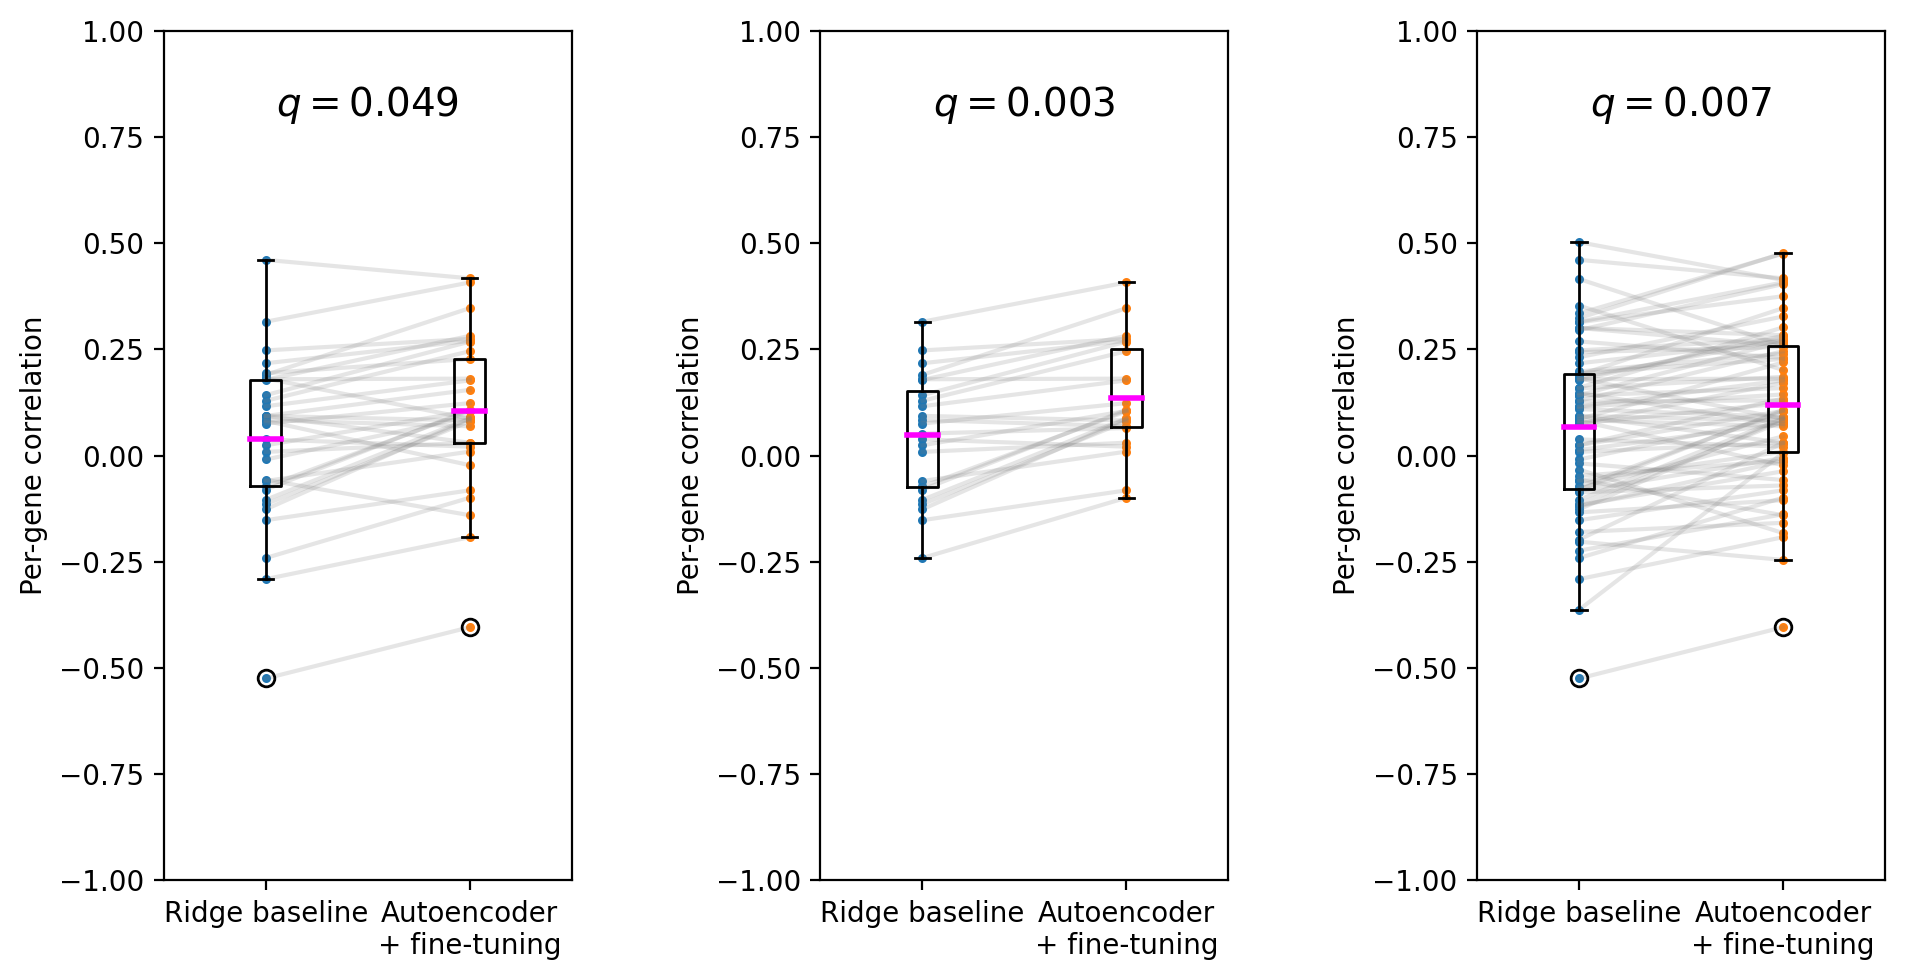

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=significant_gene_sets.shape[0], figsize=(10, 5), dpi=200)

plt.subplots_adjust(wspace=10)

for i, gs in enumerate(significant_gene_sets.index):
    genes = sorted(set(dic[gs]) & set(labels.columns))
    
    corrs1 = evaluate_Challenge_B(direct_linear[genes], labels[genes])
    corrs2 = evaluate_Challenge_B(direct_linear_ae[genes], labels[genes])
    
    for a, b in zip(corrs1, corrs2):
        ax[i].plot([0, 1], [a, b], c='gray', alpha=0.2)
        
    ax[i].scatter([0] * len(corrs1), corrs1, s=5)
    ax[i].scatter([1] * len(corrs2), corrs2, s=5)
    
    ax[i].boxplot(corrs1, positions=[0], usermedians=[np.mean(corrs1)], medianprops={'color': 'magenta', 'linewidth' : 2})
    ax[i].boxplot(corrs2, positions=[1], usermedians=[np.mean(corrs2)], medianprops={'color': 'magenta', 'linewidth' : 2})
    
    ax[i].set_xticks([0, 1], ["Ridge baseline", "Autoencoder\n+ fine-tuning"])
    ax[i].set_ylim(-1, 1)
    
    bh = significant_gene_sets.loc[gs]["wilcoxon_bh"]
    ax[i].text(0.5, 0.8, f"$q = {bh:.3f}$", horizontalalignment="center", size=14)
    
    ax[i].set_ylabel("Per-gene correlation")
        
plt.tight_layout()

module_62.txt


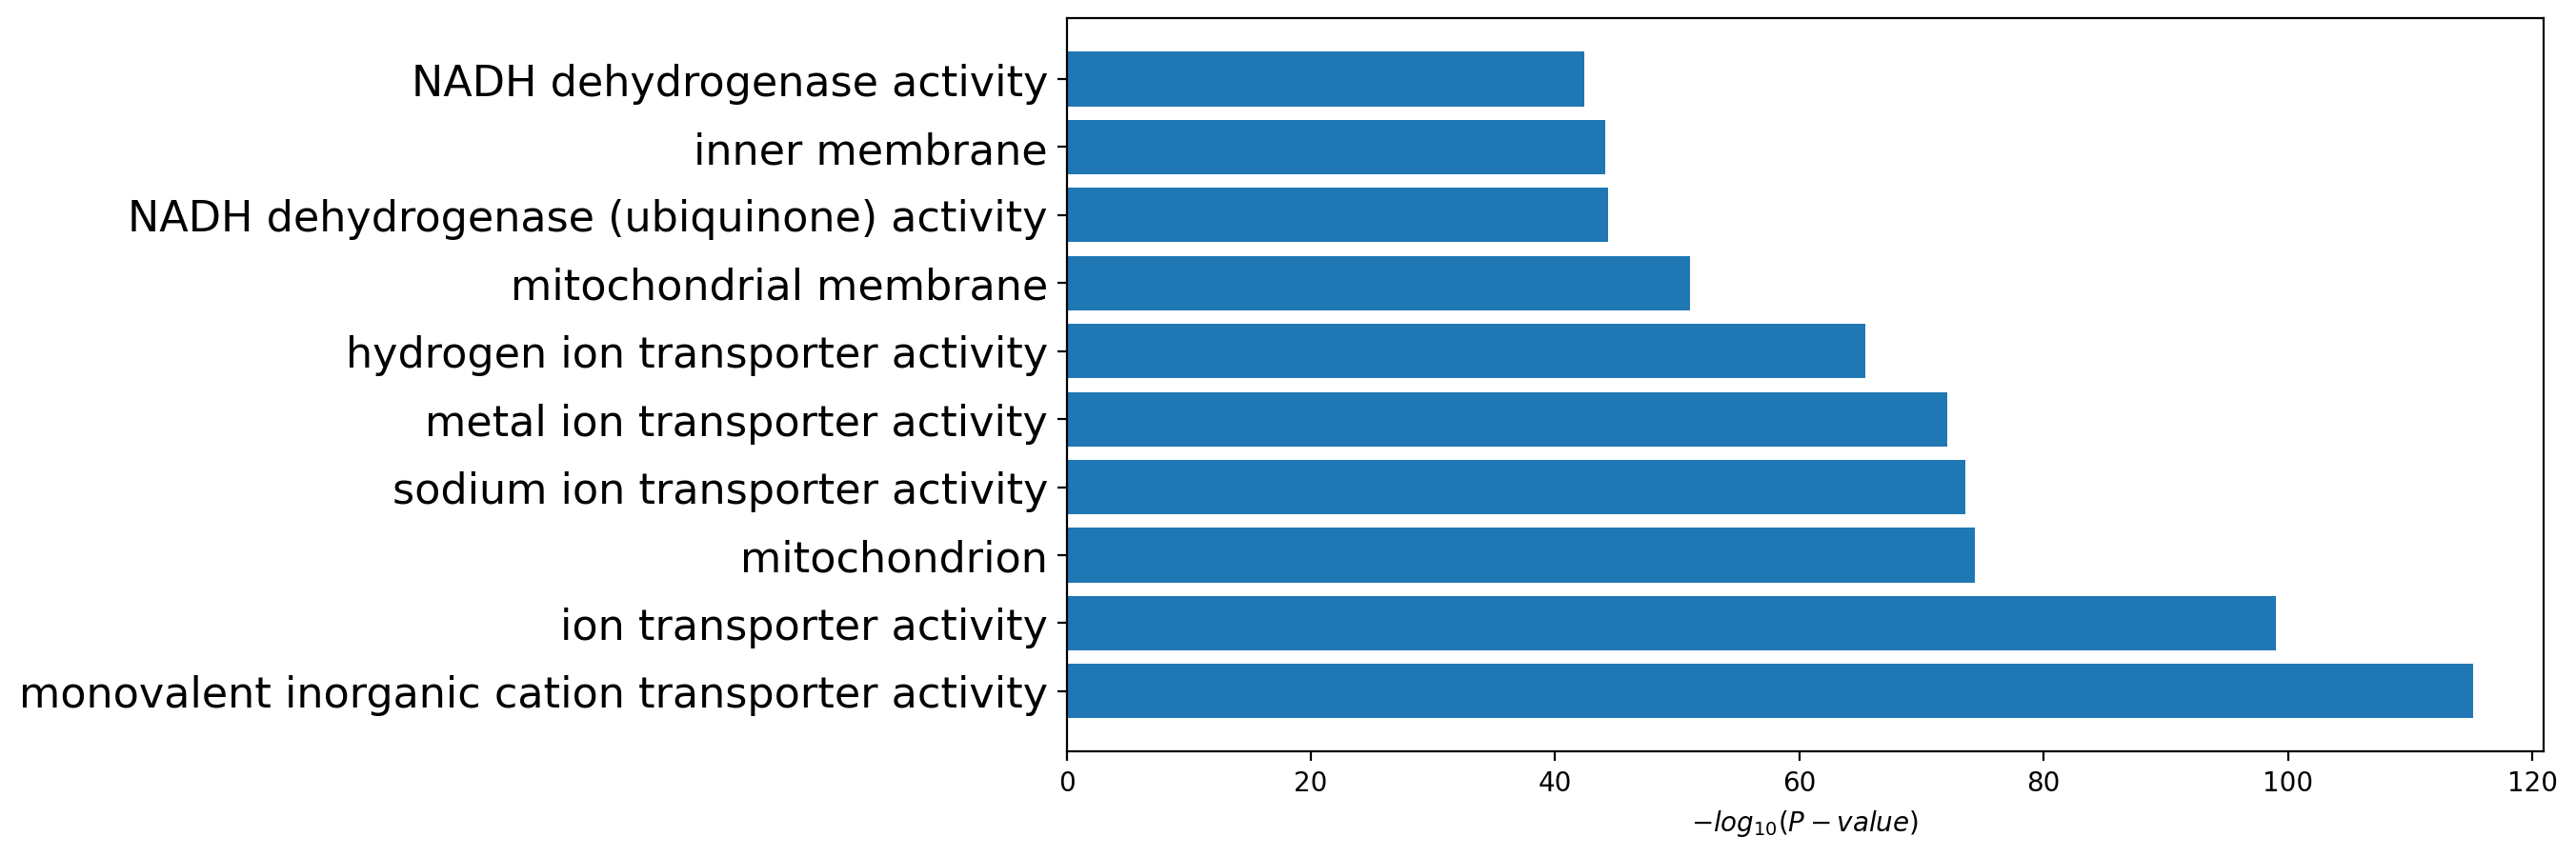

module_42.txt


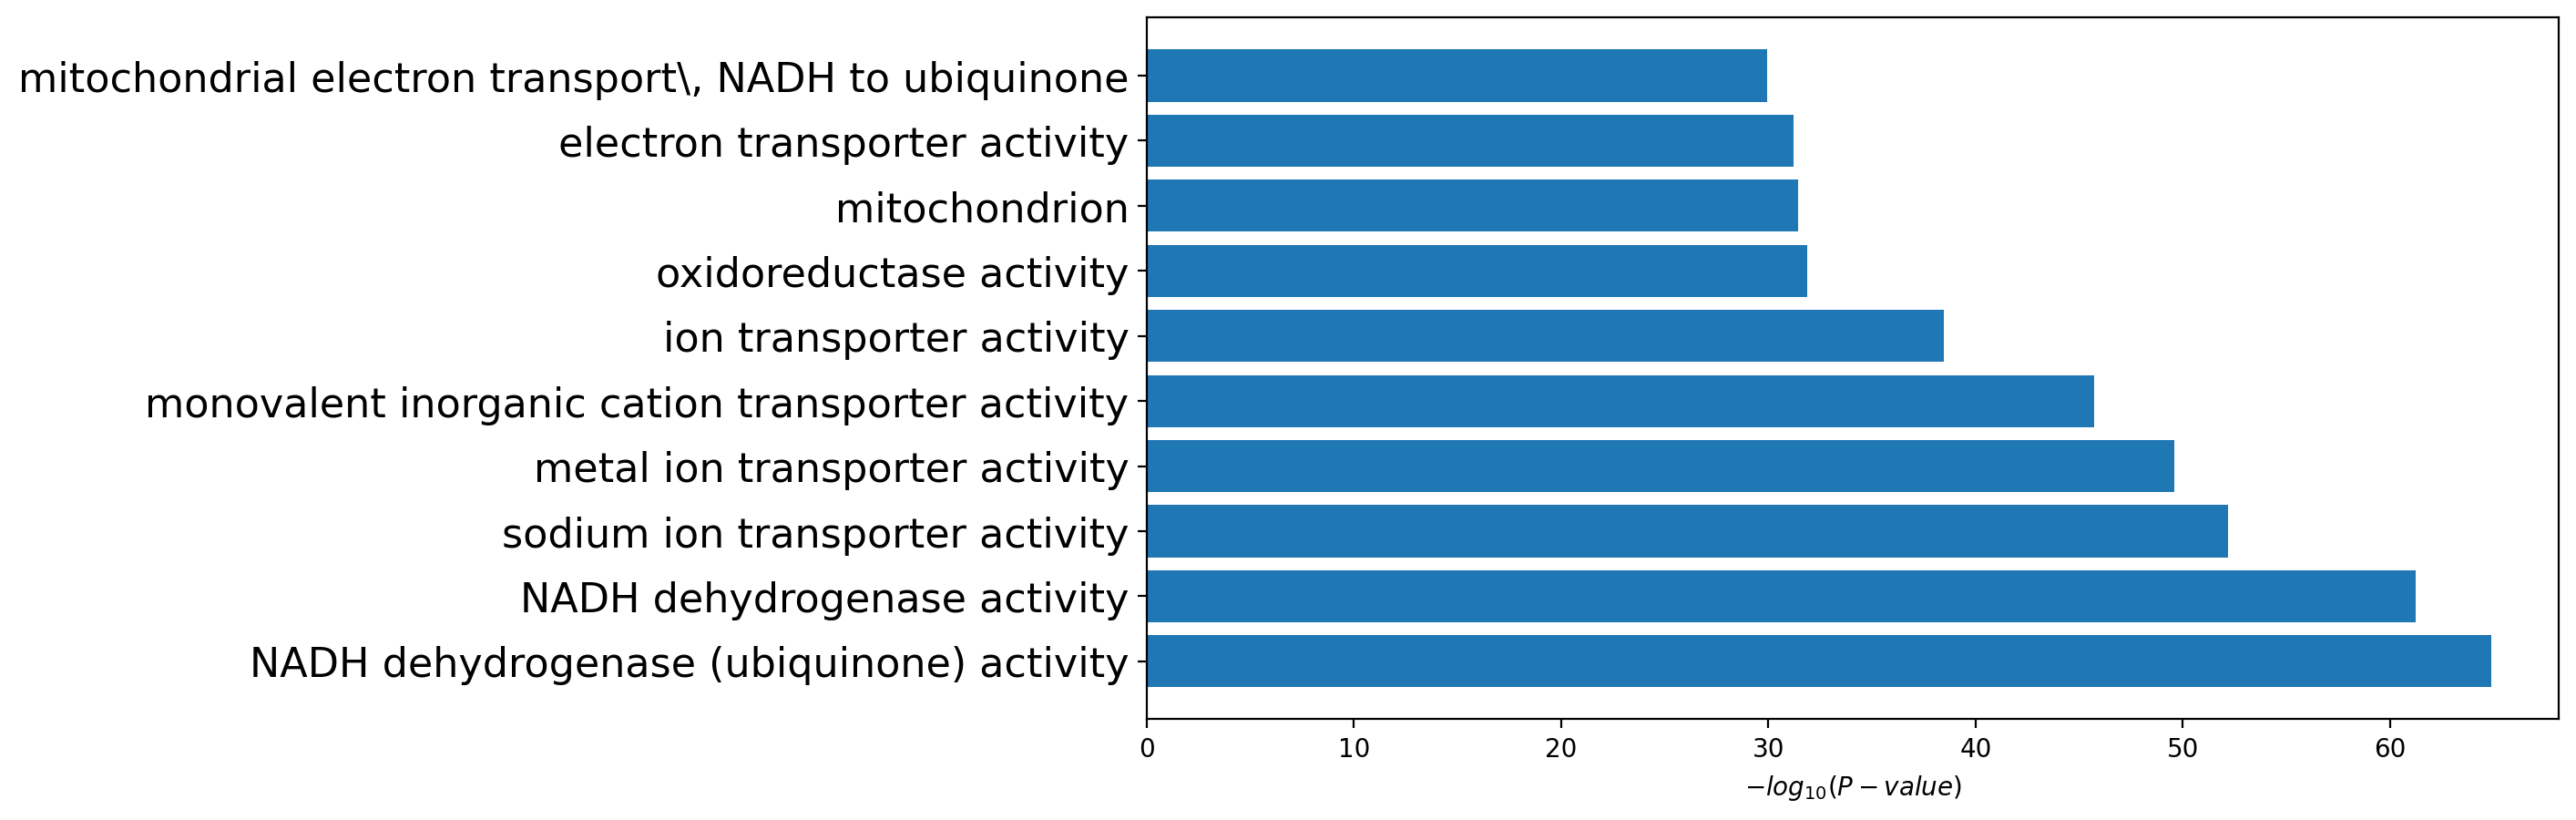

module_22.txt


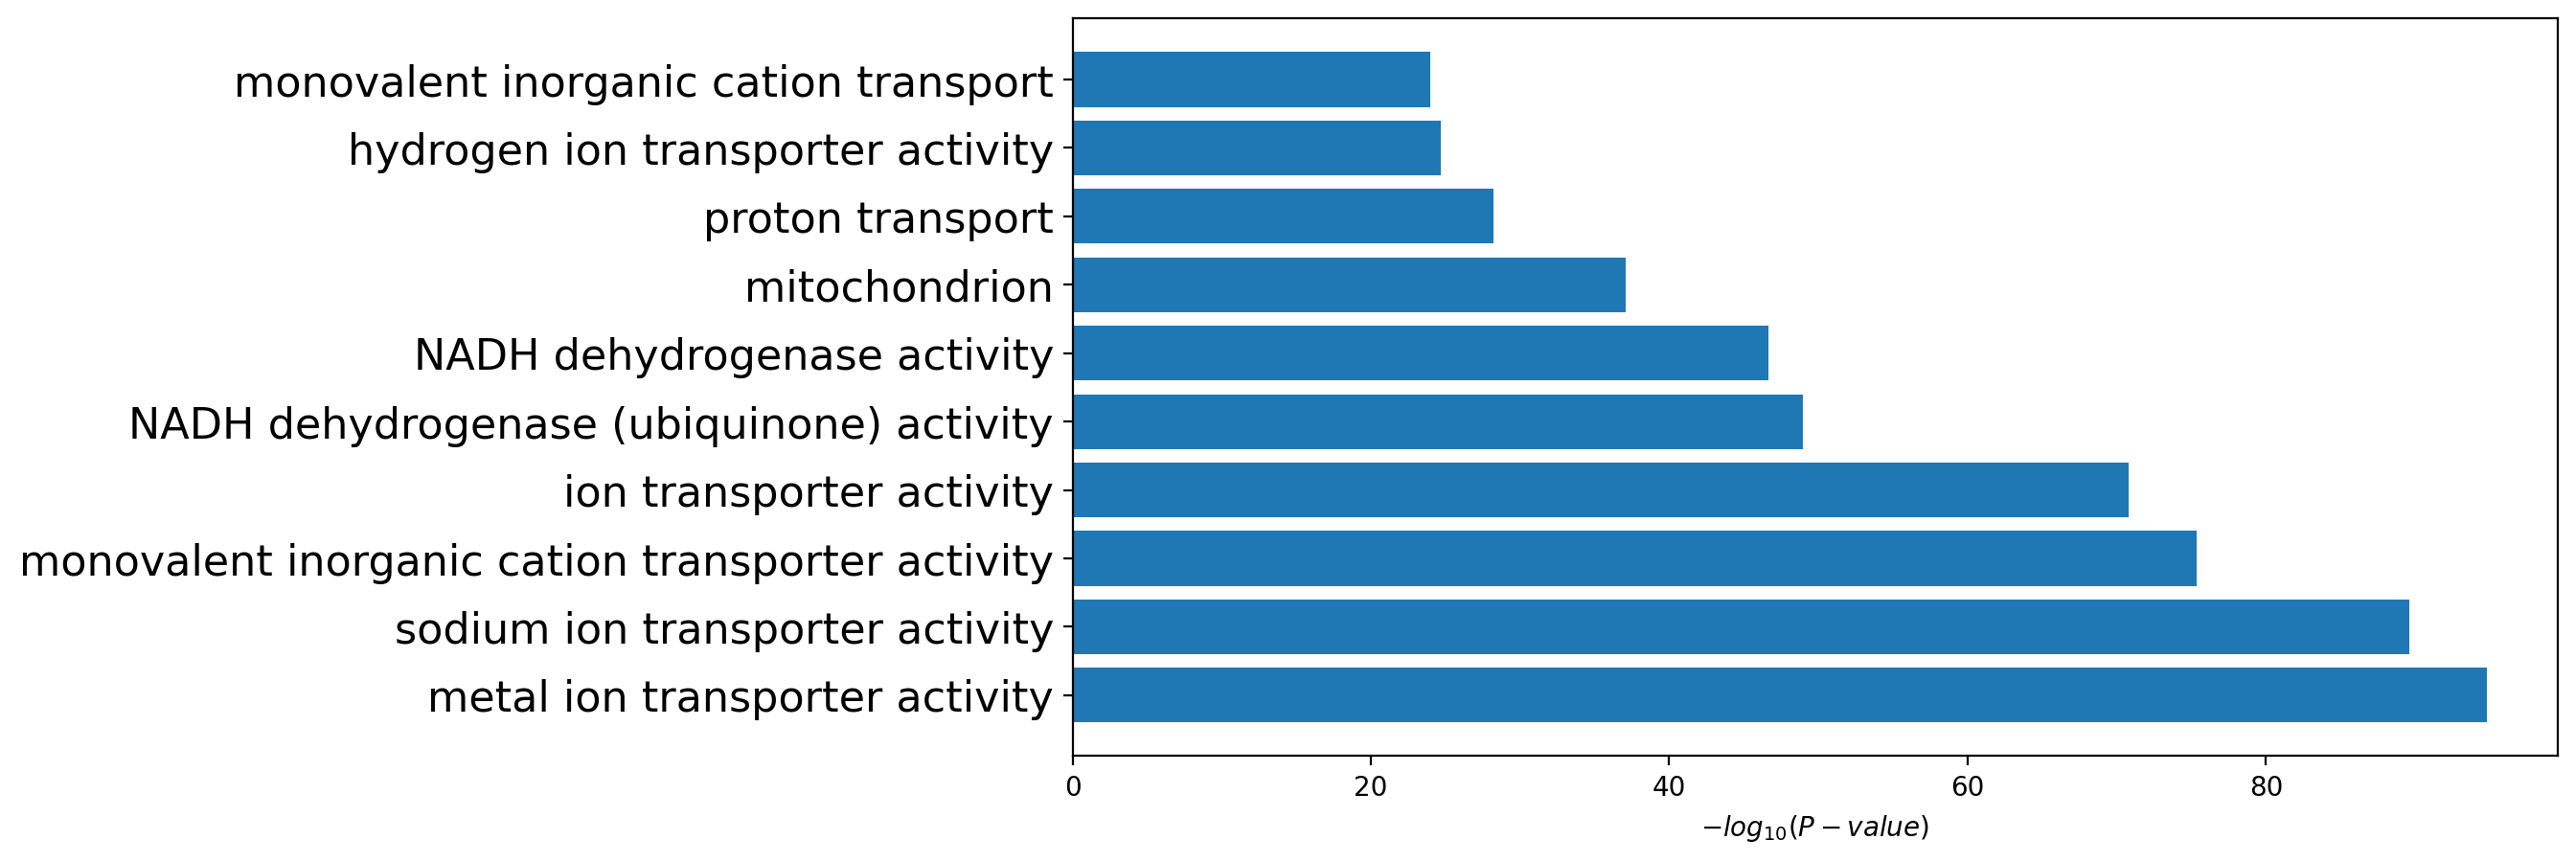

In [58]:
import os

for m in os.listdir("../data/cancer_gene_sets/go_enrich/"):
    print(m)
    module = pd.read_csv(f"../data/cancer_gene_sets/go_enrich/{m}", sep="\t", index_col=0)
    module["ngp"] = -np.log10(module["P-value"])

    plt.figure(figsize=(10, 5), dpi=200)
    plt.barh(module.index, module["ngp"])
    plt.xlabel("$-log_{10}(P-value)$")
    plt.yticks(size=16)
    plt.show() 